<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de um Modelo de Regressão para Previsão de Satisfação de Clientes. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>  Este projeto tem o intuito de ser um Modelo de Machine Learning para prever a insatisfação dos Clientes. A coluna ‘TARGET’ é a variável resposta. Ela é igual a 1 para clientes insatisfeitos e igual a 0 para clientes satisfeitos. Duas bases são dadas, uma para treino e uma para avaliação. Três são as tarefas a serem realizadas.


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>  

a) Um falso positivo ocorre quando classificamos um cliente como insatisfeito, mas ela não se comporta como tal. Neste caso, o custo de preparar e executar uma ação de retenção é um valor fixo de R$ 10 por cliente. Nada é ganho pois a ação de retenção não é capaz de mudar o comportamento do cliente. Um falso negativo ocorre quando um cliente é previsto como satisfeito, mas na verdade ele estava insatisfeito. Neste caso, nenhum dinheiro foi gasto e nada foi ganho. Um verdadeiro positivo é um cliente que estava insatisfeito e foi alvo de uma ação de retenção. O benefício neste caso é o lucro da ação (R$ 100) menos os custos relacionados à ação de retenção (R$ 10). Por fim, um verdadeiro negativo é um cliente insatisfeito e que não é alvo de nenhuma ação. O benefício neste caso é zero, isto é, nenhum custo, mas nenhum lucro. A primeira tarefa deste case é maximizar o lucro esperado por cliente considerando o contexto descrito no parágrafo acima.

b) A segunda tarefa consiste em dar uma nota de 1 a 5 para cada cliente da base teste, respeitando a variável ‘TARGET’, isto é, o seu nível de satisfação, sendo 1 o mais insatisfeito e 5 o mais satisfeito. Ao dar essa nota deve-se ter em mente que somente os clientes com nota 1 serão alvos de uma ação de retenção e que o objetivo dessa ação é maximizar o lucro esperado por cliente (usando os mesmos valores da primeira questão).

c) Todo conjunto de dados é passível de ser dividido em grupos coesos, conhecidos como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que possuem os maiores lucros esperados por cliente (usando os mesmos valores da
primeira questão).


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> 
</i> 
</p>  


https://www.kaggle.com/competitions/santander-customer-transaction-prediction


# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [40]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.diagnostic import lilliefors

# Bibliotecas de Manipulação de Tempo
import time
import datetime

# Bibliotecas de Seleção de Modelos
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.feature_selection import RFE, SelectKBest, chi2, VarianceThreshold
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer 

# Bibliotecas de Pré-Processamento e Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, silhouette_score


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras 

In [41]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [42]:
def plota_histograma(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        mediana = df[lista_variaveis[k]].median()
        media = df[lista_variaveis[k]].mean().round()
        plt.figure(figsize = (14, 7))
        ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30)
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.ticklabel_format(style='plain')
        plt.legend(loc = 'best')
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1

* Plota Boxplot

In [43]:
def plota_boxplot(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        plt.figure(figsize = (14, 7))
        ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', orient = 'h')
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 4), sharey = True)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], orient = 'h')
                ax.set_title(f'{titulo}')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                k = k + 1

* Plota Dispersão

In [44]:
def plota_dispersao(df, titulo,  x, y, metodo):
    plt.figure(figsize = (10, 5))
    sns.set(style = 'whitegrid')
    corr1 = str(df[[x, y]].corr(method = metodo).iloc[1, 0].round(2))
    sns.scatterplot(data = df, x = x, y = y, color = '#1FB3E5', sizes = 1, alpha = 0.50, marker = '.')
    plt.text(1, 1, f'Correlacao: {corr1}', fontsize = 12)
    plt.title(f'{titulo}', fontsize = 14)
    plt.xlabel(f'{x}', fontsize = 14)
    plt.ylabel(f'{y}', fontsize = 14)
    plt.ticklabel_format(style = 'plain')
    plt.grid(True, linestyle=':')
    sns.despine()
    plt.tight_layout()
    plt.show()

## Funções de Estatística

* Analisa Correlação

In [45]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize = (10, 5))
    sns.heatmap(df.corr(method = metodo), vmin = -1, vmax = 1, cmap = 'magma', annot = True)
    plt.title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

* Analisa Normalidade 

In [46]:
def analisa_normalidade(amostra1, amostra2, variavel):

    normaltest_amostra_1 = normaltest(amostra1[variavel])
    normaltest_amostra_2 = normaltest(amostra2[variavel])

    if (normaltest_amostra_1[1] < 0.05 ) and (normaltest_amostra_2[1] < 0.05):
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de que a variável "{variavel}" segue uma Distribuição Normal é REJEITADA!')
    else:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de  que a variável "{variavel}" segue uma Distribuição Normal é ACEITA')

    ax1 = plt.subplot(121)
    stats.probplot(amostra1[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 1', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    ax1 = plt.subplot(122)
    stats.probplot(amostra2[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 2', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()

    plt.show()

* Teste de Hipótese para Duas Amostras Independentes 

In [47]:
def teste_hipotese_duas_amostras_independentes(parametrico, amostra1, amostra2, variavel):
    media_amostra_1 = amostra1[variavel].mean()
    media_amostra_2 = amostra2[variavel].mean()
    mediana_amostra_1 = amostra1[variavel].median()
    mediana_amostra_2 = amostra2[variavel].median()

    if parametrico == True: 
        print(f'Média Amostra 1: {media_amostra_1}')
        print(f'Média Amostra 2: {media_amostra_2}')
        stat, p_value = ztest(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese Z, não há diferença significativa entre as médias da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese Z, há diferença significativa entre as médias da Amostra 1 e Amostra 2')
    else:
        print(f'Mediana Amostra 1: {mediana_amostra_1}')
        print(f'Mediana Amostra 2: {mediana_amostra_2}')
        stat, p_value = stats.mannwhitneyu(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese de Mann Whitney, não há diferença significativa entre as medianas da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2')

- Teste de Hipótese para Muitas Amostras Independentes 

In [48]:
def teste_hipotese_muitas_amostras_independentes(amostras, variavel):
    medianas = []
    
    for i, amostra in enumerate(amostras):
        mediana_amostra = amostra[variavel].median()
        medianas.append(mediana_amostra)
        print(f'Mediana Amostra {i+1}: {mediana_amostra}')

    stat, p_value = kruskal(*[amostra[variavel] for amostra in amostras])
    
    if p_value > 0.05:
        print(f'Pelo teste de Kruskal-Wallis, não há diferença significativa entre as medianas das amostras')
    else:
        print(f'Pelo teste de Kruskal-Wallis, há diferença significativa entre as medianas das amostras')


## Funções de Pré-Processamento

* Separa entre Features e Target 

In [49]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y

* Separa entre Treino e Teste

In [50]:
def separa_treino_teste(target, dados, size):
    x = dados.drop(target, axis = 1)
    y = dados[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= size, random_state = 42)

    df_train = pd.concat([x_train, y_train], axis = 1)
    df_test = pd.concat([x_test, y_test], axis = 1)

    return df_train, df_test

- Discretização

In [51]:
def discretiza_variavel(df, variavel_quant, variavel_qualit, bins, labels, right):
    df[variavel_qualit] = pd.cut(
        df[variavel_quant], 
        bins= bins, 
        labels= labels, 
        right = right
    )
    df.drop(variavel_quant, axis = 1, inplace = True)

## Funções de Métricas ou Avaliação

* Métricas Gerais

In [52]:
def metricas_classificacao(classificador, y_train, y_predict_train, y_test, y_predict_test):
    accuracy = accuracy_score(y_train, y_predict_train)
    precision = precision_score(y_train, y_predict_train)
    recall = recall_score(y_train, y_predict_train)
    f1 = f1_score(y_train, y_predict_train)
    roc_curve = roc_auc_score(y_train, y_predict_train)
    metricas_treino = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'treino','Classificador':classificador}, index = np.arange(1))
    
    accuracy = accuracy_score(y_test, y_predict_test)
    precision = precision_score(y_test, y_predict_test)
    recall = recall_score(y_test, y_predict_test)
    f1 = f1_score(y_test, y_predict_test)
    roc_curve = roc_auc_score(y_test, y_predict_test)
    metricas_teste = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'teste','Classificador':classificador}, index = np.arange(1, 2))
    metricas_finais = pd.concat([metricas_treino, metricas_teste])
    return metricas_finais

def metricas_classificacao_modelos_juntos(lista_modelos):
    metricas_modelos = pd.concat(lista_modelos).set_index('Classificador')
    return metricas_modelos

* Validação Cruzada 

In [53]:
def validacao_cruzada_classificacao(target_type, x_train, y_train, n_splits, classificador):
    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int') or (x_train[column].dtype.name == 'float')]
    
    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', BinaryEncoder(handle_unknown='ignore', sparse=False))
    ])
    
    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])
    
    pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])
    
    if target_type == 'categorico':
        y_train.fillna(y_train.mode()[0], inplace=True)
    else:
        y_train.fillna(y_train.median(), inplace=True)
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    if classificador == 'Regressão Logística':
        model = make_pipeline(pre_processamento, LogisticRegression(random_state=42, class_weight={0: 1, 1: 3}))
    elif classificador == 'KNN':
        model = make_pipeline(pre_processamento, KNeighborsClassifier())
    elif classificador == 'SVC':
        model = make_pipeline(pre_processamento, SVC(random_state=42, kernel='linear', C=0.05, class_weight={0: 1, 1: 3}))
    elif classificador == 'Random Forest':
        model = make_pipeline(pre_processamento, RandomForestClassifier(random_state=42, criterion='entropy', n_estimators=100, max_depth=7, class_weight={0: 1, 1: 3}))
    elif classificador == 'Gradient Boosting':
        model = make_pipeline(pre_processamento, GradientBoostingClassifier(random_state=42))
    elif classificador == 'XGBoost':
        model = make_pipeline(pre_processamento, XGBClassifier(random_state=42, n_estimators=200, max_depth=2, learning_rate=0.8, eval_metric='logloss', objective='binary:logistic', scale_pos_weight=3))
    else:
        print('Utilize Regressão Logística, KNN, SVC, Random Forest, Gradient Boosting, ou XGBoost como opções de Classificadores!')

    accuracy = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy').mean()
    precision = cross_val_score(model, x_train, y_train, cv=kfold, scoring='precision').mean()
    recall = cross_val_score(model, x_train, y_train, cv=kfold, scoring='recall').mean()
    f1 = cross_val_score(model, x_train, y_train, cv=kfold, scoring='f1').mean()
    roc_curve = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc').mean()
    
    metricas_finais = pd.DataFrame({'Acuracia': accuracy,
                                    'Precisao': precision,
                                    'Recall': recall,
                                    'F1': f1,
                                    'Roc_Curve':roc_curve, 
                                    'Etapa':'validacao_cruzada',
                                    'Classificador':classificador}, 
                                    index = np.arange(1, 2))
    return metricas_finais

- Ganhos e Perdas 

In [54]:
def ganhos_e_perdas(dados):
    customer_ids = dados['customer_id']
    mediana_valores_recebidos_churn = dados.loc[dados.churn_label == 1]['total_charges'].median()
    y = dados['churn_label']
    y_predict = dados['churn_label_predict']

    accuracy = accuracy_score(y, y_predict)
    precision = precision_score(y, y_predict)
    recall = recall_score(y, y_predict)
    f1 = f1_score(y, y_predict)
    roc_curve = roc_auc_score(y, y_predict)

    matriz_confusao = confusion_matrix(y, y_predict)
    matriz_custo_beneficios = np.array([[0, 100], 
                                       [mediana_valores_recebidos_churn, mediana_valores_recebidos_churn]])


    resultados_esperados = 'R$' + str(matriz_confusao[0, 0]*matriz_custo_beneficios[0, 0]-matriz_confusao[0, 1]*matriz_custo_beneficios[0, 1]-matriz_confusao[1, 0]*matriz_custo_beneficios[1, 0]+matriz_confusao[1, 1]*matriz_custo_beneficios[1, 1])
    
    return matriz_confusao, matriz_custo_beneficios, resultados_esperados

## Funções de Machine Learning

* Definição do Número de Clusters pelo Elbow Method

In [55]:
def elbow_method(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    wcss = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=300)
        kmeans.fit(padronizado)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    sns.lineplot(range(1, 11), wcss, marker='o', color='orange')
    plt.title('O Método Elbow', fontsize=16, fontweight='bold')
    plt.xlabel('Número de Clusters', fontsize=12)
    plt.ylabel('WCSS (Soma dos Quadrados das Distâncias)', fontsize=12)
    plt.xticks(range(1, 11))
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


* Algoritmo de Clusterização

In [56]:
def kmeans_esc(data, features , n_clusters):

    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features])

    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, max_iter = 300)
    kmeans = kmeans.fit(padronizado)
    
    clusters = kmeans.labels_ # Clusters para cada um dos registros 

    return clusters

* Reordenando Clusters

In [57]:
def ordenador_de_cluster(metodo_cluster, variavel, ordem, dados):

    media_cluster = dados.groupby(metodo_cluster, as_index = False)[variavel].mean()
    score_cluster = media_cluster.sort_values(by = variavel, ascending = ordem)
    score_cluster['index'] = media_cluster.index 

    df_final = dados.merge(score_cluster[[metodo_cluster, 'index']], on = metodo_cluster)
    df_final.drop(metodo_cluster, axis = 1, inplace = True)
    df_final.rename({'index':metodo_cluster}, axis = 1, inplace = True)


    return df_final


* Regressão Logística 

In [58]:
def regressao_logistica(target_type, x_train, y_train, x_test, y_test, otimizacao):
    # x_train.reset_index(drop=True, inplace=True)
    # y_train.reset_index(drop=True, inplace=True)

    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]
    
    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', BinaryEncoder())
    ])
    
    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    pipeline_pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if otimizacao == True:
        pipeline_feature_selection = Pipeline([
            ('variance_threshold', VarianceThreshold(threshold=0.01)),
            ('select_k_best', SelectKBest(score_func=f_regression)),
        ])
        pipeline_optimal_hiperparams = Pipeline([
            ('random_search', RandomizedSearchCV(
                estimator = LogisticRegression(),
                param_grid = {'feature_selection__select_k_best__k': range(1, 10), 'model__C': [0.1, 1.0, 10.0], 'model__class_weight': [{0: 1, 1: 3}, {0: 1, 1: 9}]},
                scoring='accuracy',
                cv=5,
                n_iter=10,
                n_jobs=-1
            ))
        ])
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento),
            ('feature_selection', pipeline_feature_selection),
            ('optimal_hiperparams', pipeline_optimal_hiperparams)
        ])

        model = pipeline.fit(x_train, y_train)

    else:
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento)
        ])

        model = make_pipeline(pipeline, LogisticRegression(random_state=42))
        model.fit(x_train, y_train)

    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    

    return y_predict_train, y_predict_test


- KNN 

In [59]:
def classifiacao_knn(target_type, x_train, y_train, x_test, y_test, otimizacao):
    # x_train.reset_index(drop=True, inplace=True)
    # y_train.reset_index(drop=True, inplace=True)

    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]
    
    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', BinaryEncoder())
    ])
    
    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    pipeline_pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if otimizacao == True:
        pipeline_feature_selection = Pipeline([
            ('variance_threshold', VarianceThreshold(threshold=0.01)),
            ('select_k_best', SelectKBest(score_func=f_regression)),
        ])
        pipeline_optimal_hiperparams = Pipeline([
            ('random_search', RandomizedSearchCV(
                estimator=KNeighborsClassifier(),
                param_distributions={'feature_selection__select_k_best__k': range(1, 10), 'model__n_neighbors': [3, 5, 7], 'model__class_weight': [{0: 1, 1: 3}, {0: 1, 1: 9}]},
                scoring='accuracy',
                cv=5,
                n_iter=10,
                n_jobs=-1
            ))
        ])
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento),
            ('feature_selection', pipeline_feature_selection),
            ('optimal_hiperparams', pipeline_optimal_hiperparams)
        ])

        model = pipeline.fit(x_train, y_train)

    else:
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento)
        ])

        model = make_pipeline(pipeline, KNeighborsClassifier(random_state=42))
        model.fit(x_train, y_train)
    
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    
    return y_predict_train, y_predict_test


* SVC 

In [60]:
def classificacao_svm(target_type, x_train, y_train, x_test, y_test, otimizacao):
    # x_train.reset_index(drop=True, inplace=True)
    # y_train.reset_index(drop=True, inplace=True)

    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]
    
    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', BinaryEncoder())
    ])
    
    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    pipeline_pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if otimizacao == True:
        pipeline_feature_selection = Pipeline([
            ('variance_threshold', VarianceThreshold(threshold=0.01)),
            ('select_k_best', SelectKBest(score_func=f_regression)),
        ])
        pipeline_optimal_hiperparams = Pipeline([
            ('random_search', RandomizedSearchCV(
                estimator=SVC(random_state=42, class_weight = {0: 1, 1: 9}),
                param_distributions={'feature_selection__select_k_best__k': range(1, 10), 'model__C': [0.1, 1.0, 10.0], 'model__kernel': ['linear', 'rbf'], 'model__class_weight': [{0: 1, 1: 3}, {0: 1, 1: 9}]},
                scoring='accuracy',
                cv=5,
                n_iter=10,
                n_jobs=-1
            ))
        ])
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento),
            ('feature_selection', pipeline_feature_selection),
            ('optimal_hiperparams', pipeline_optimal_hiperparams)
        ])

        model = pipeline.fit(x_train, y_train)

    else:
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento)
        ])

        model = make_pipeline(pipeline, SVC(random_state=42))
        model.fit(x_train, y_train)
    
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)

    return y_predict_train, y_predict_test


* Random Forest 

In [61]:
def classificacao_random_forest(target_type, x_train, y_train, x_test, y_test, otimizacao):
    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]
    
    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', BinaryEncoder())
    ])
    
    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ])
    
    pipeline_pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if otimizacao == True:
        pipeline_feature_selection = Pipeline([
            ('variance_threshold', VarianceThreshold(threshold=0.01)),
            ('select_k_best', SelectKBest(score_func=f_regression)),
        ])
        pipeline_optimal_hiperparams = Pipeline([
            ('random_search', RandomizedSearchCV(
                estimator=RandomForestClassifier(random_state=42),
                param_distributions={'feature_selection__select_k_best__k': range(1, 10), 'model__n_estimators': [50, 100, 150], 'model__max_depth': [5, 10, 15], 'model__class_weight': [{0: 1, 1: 3}, {0: 1, 1: 9}]},
                scoring='accuracy',
                cv=5,
                n_iter=10,
                n_jobs=-1
            ))
        ])
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento),
            ('feature_selection', pipeline_feature_selection),
            ('optimal_hiperparams', pipeline_optimal_hiperparams)
        ])

        model = pipeline.fit(x_train, y_train)

    else:
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento)
        ])

        model = make_pipeline(pipeline, RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
        model.fit(x_train, y_train)
    
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    
    feature_importance = model.named_steps['randomforestclassifier'].feature_importances_
    feature_names = x_train.columns
    
    importance_dict = dict(zip(feature_names, feature_importance))
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    sorted_importance = pd.DataFrame(sorted_importance).rename({0:'feature', 1:'feature_importance'}, axis=1)

    return y_predict_train, y_predict_test, sorted_importance


- XGBoost

In [62]:
def classificacao_xgboost(target_type, x_train, y_train, x_test, y_test, otimizacao):
    x_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]
    
    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', BinaryEncoder())
    ])
    
    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
    ])
    
    pipeline_pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if otimizacao == True:
        pipeline_feature_selection = Pipeline([
            ('variance_threshold', VarianceThreshold(threshold=0.01)),
            ('select_k_best', SelectKBest(score_func=f_regression)),
        ])
        pipeline_optimal_hiperparams = Pipeline([
            ('random_search', RandomizedSearchCV(
                estimator=XGBClassifier(random_state=42, scale_pos_weight=9),
                param_distributions={'feature_selection__select_k_best__k': range(1, 10), 'model__n_estimators': [100, 200, 300], 'model__max_depth': [2, 4, 6], 'model__learning_rate': [0.05, 0.1, 0.5, 0.8], 'model__scale_pos_weight': [3, 9]},
                scoring='accuracy',
                cv=5,
                n_iter=10,
                n_jobs=-1
            ))
        ])
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento),
            ('feature_selection', pipeline_feature_selection),
            ('optimal_hiperparams', pipeline_optimal_hiperparams)
        ])

        model = pipeline.fit(x_train, y_train)

    else:
        pipeline = Pipeline([
            ('pre_processing', pipeline_pre_processamento)
        ])

        model = make_pipeline(pipeline, XGBClassifier(random_state=42, n_estimators=200, max_depth=2, learning_rate=0.8, eval_metric='logloss', objective='binary:logistic', scale_pos_weight=9))
        model.fit(x_train, y_train)
    
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    
    feature_importance = model.named_steps['xgbclassifier'].feature_importances_
    feature_names = x_train.columns
    
    importance_dict = dict(zip(feature_names, feature_importance))
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    sorted_importance = pd.DataFrame(sorted_importance).rename({0:'feature', 1:'feature_importance'}, axis=1)

    return y_predict_train, y_predict_test, sorted_importance


# <font color='red' style='font-size: 40px;'> 1) Divisão Inicial </font>
<hr style='border: 2px solid red;'>

### 1.1) Separação em Treino, Teste e Validação

In [63]:
train = pd.read_csv('../100_case_santander/data/train.csv')
test = pd.read_csv('../100_case_santander/data/test.csv')

train.drop('ID_code', axis = 1, inplace = True)
test.drop('ID_code', axis = 1, inplace = True)

df_train = separa_treino_teste('target', train, 0.25)[0]
df_valid = separa_treino_teste('target', train, 0.25)[1]
df_test = test.copy()

print(f'Quantidade de registros Treino: {df_train.shape[0]}')
print(f'Quantidade de registros Validação: {df_valid.shape[0]}')
print(f'Quantidade de registros Teste: {df_test.shape[0]}')

Quantidade de registros Treino: 150000
Quantidade de registros Validação: 50000
Quantidade de registros Teste: 200000


> 1. Antes de qualquer análise ou modelagem, deve-se separar em Treino, Validação e Teste. 

> 2. Isso é fundamental para o projeto, pois esta abordagem evita o Data Leakage (Vazamento de Dados)

> 3. Dessa forma, teremos três situações:

- Treino: Dados usados para Análise Exploratória e Modelagem
- Validação: Dados usados para Análise de Desempenho do Modelo
- Teste: Predição de Dados nunca vistos anteriormente, simulando um ambiente em produção

# <font color='red' style='font-size: 40px;'> 2) Análise Exploratória - Análise Univariada e Bivariada</font>
<hr style='border: 2px solid red;'>

### 2.2) Análise dos Tipos de Variáveis

In [65]:
analytics = df_train.copy()

qualitativas = [column for column in analytics.columns if analytics[column].dtype.name == 'object']
discretas = [column for column in analytics.columns if analytics[column].dtype.name == 'int64']
continuas = [column for column in analytics.columns if analytics[column].dtype.name == 'float64']

print(f'Quantidade de Colunas Qualitativas: {len(qualitativas)}')
print(f'Quantidade de Colunas Discretas: {len(discretas)}')
print(f'Quantidade de Colunas Continuas: {len(continuas)}')

Quantidade de Colunas Qualitativas: 0
Quantidade de Colunas Discretas: 1
Quantidade de Colunas Continuas: 200


### 2.3) Análise da Qualidade dos Dados

In [66]:
nulos = analytics.isnull().sum().sum()
print(f'Quantidade de Dados Nulos: {nulos}')

Quantidade de Dados Nulos: 0


### 2.4) Análise Univaridada da Target

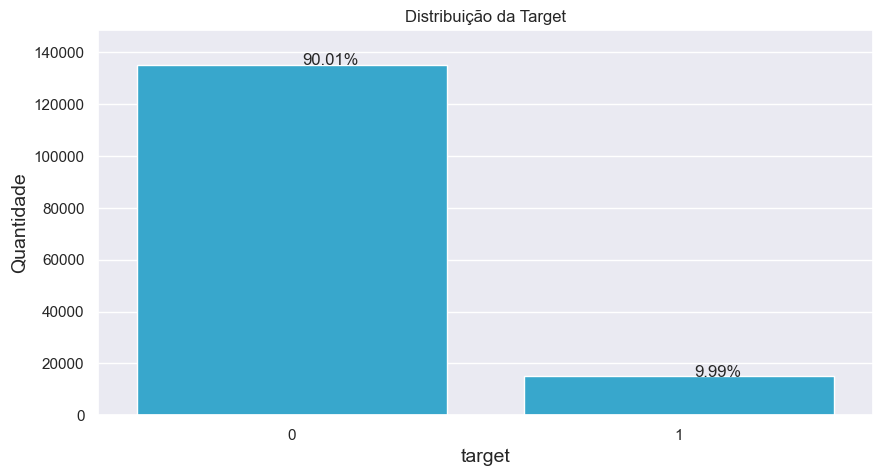

In [67]:
plota_barras(['target'], False, analytics, 1, 1, 'Distribuição da Target')

> 1. A Target possui um comportamento bem desbalanceado, ou seja, em torno de 90% dos clientes apresentam satisfação, ao passo que 10% apresenta insatisfação.

### 2.5) Análise de Estatística Descritiva das Features

,features,mean,median,mode,min,max,std
0,var_0,10.68,10.53,8.94,0.45,20.32,3.04
1,var_1,-1.63,-1.60,-6.06,-15.04,10.38,4.05
2,var_2,10.71,10.58,7.60,2.12,18.65,2.64
3,var_3,6.80,6.83,5.84,-0.04,13.19,2.05
4,var_4,11.08,11.11,10.90,5.07,16.67,1.62


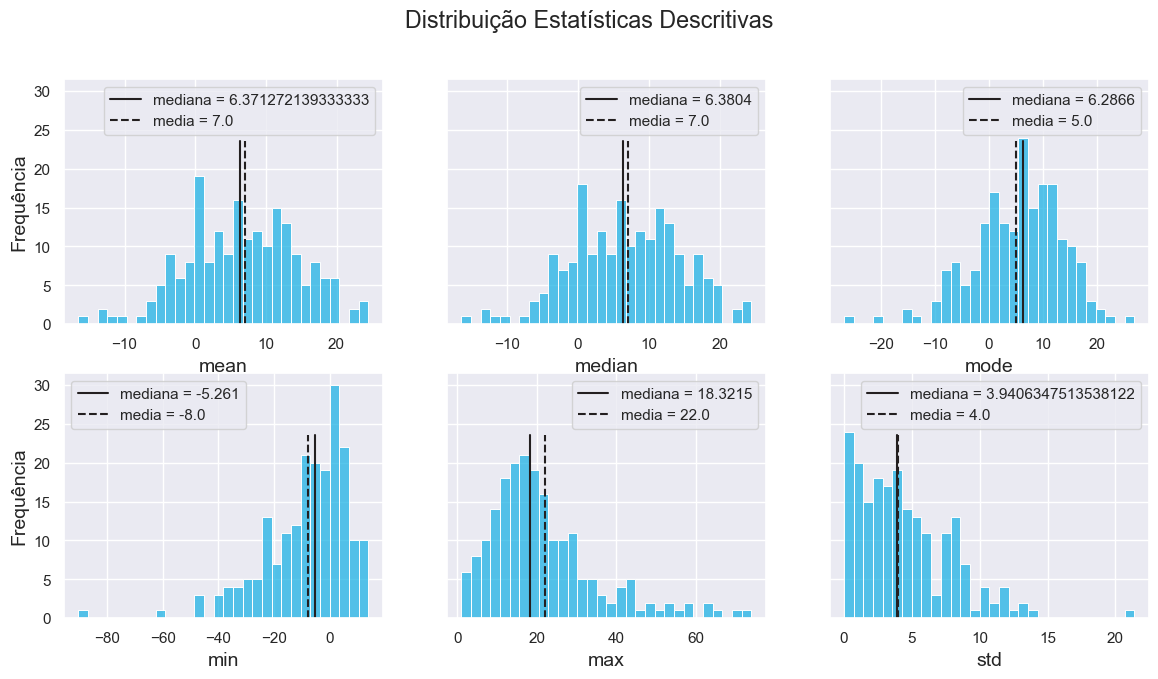

In [68]:
list_features = [col for col in analytics.columns]
list_means = [analytics[col].mean() for col in analytics.columns]
list_medians = [analytics[col].median() for col in analytics.columns]
list_mode = [analytics[col].mode()[0] for col in analytics.columns]
list_min = [analytics[col].min() for col in analytics.columns]
list_max = [analytics[col].max() for col in analytics.columns]
list_std = [analytics[col].std() for col in analytics.columns]

analytics_statitics = pd.DataFrame({'features':list_features, 'mean': list_means, 'median': list_medians, 'mode': list_mode, 'min': list_min, 'max': list_max, 'std': list_std})
display(analytics_statitics.head())
plota_histograma(['mean', 'median', 'mode','min', 'max', 'std'], analytics_statitics, 2, 3, 'Distribuição Estatísticas Descritivas')

> 1. Como há muitas colunas e elas não possuem nome, é impossível realizar uma análise atrelada ao conhecimento de Negócios.

> 2. Dessa forma, optou-se por entender de forma massificada como as variáveis se comportam utilizando estatísticas descritivas como medidas de tendência central e medidas de dispersão

> 3. Insights:

- Medidas de Tendência Central: A Média, Mediana e Moda das Variáveis segue uma distribuição relativamente simétrica, sem grandes assimetrias. Isso significa que as variáveis tem escalas próximas, ou seja, nenhuma delas aparenta ter valores extremamente diferentes (como seria o caso de uma comparação de Idade vs Salário, por exemplo)

- Máximo e Mínimo: Por outro lado, o Máximo e Mínimo mostram que há Outliers diferentes nas variáveis. No caso do Máximo nota-se uma assimetria para a direita, portanto, há um número considerável Outliers Positivos, ao passo que outras não possuem. No caso do Mínimo, a assimetria a esquerda é mostra que não há tantos Outliers Negativos. Além disso, percebe-se que há mais valores positivos que negativos em nosso dataset

- Medidas de Dispersão: O Desvio Padrão aparenta ter uma assimetria a direita, entretanto, as médias e medianas dos desvios padrões mostram que a maior parte das variáveis tem os valores mais concetrados ao redor da média.

### 2.6) Testando a Hipótese do Público Satisfeito e do Insatisfeito ter comportamentos diferentes

Quantidade de Clientes Satisfeitos: 135022
Quantidade de Clientes Insatisfeitos: 14978
Pelo Teste de Hipótese, A Hipótese Nula de  que a variável "mean" segue uma Distribuição Normal é ACEITA


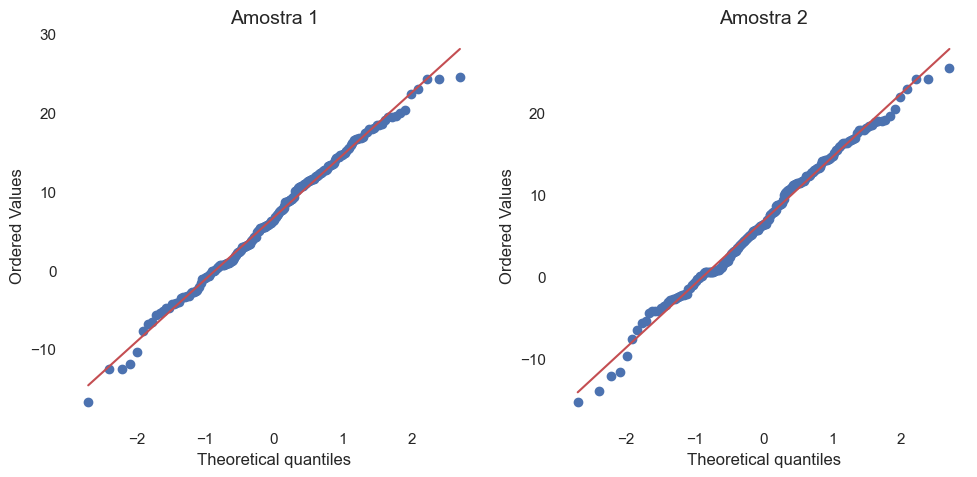

Média Amostra 1: 6.731530732393637
Média Amostra 2: 6.761123890661527
Pelo Teste de Hipótese Z, não há diferença significativa entre as médias da Amostra 1 e Amostra 2


In [69]:
analytics_stratified = analytics.copy()

# Satisfeitos
analytics_satisfied = analytics_stratified.loc[analytics_stratified.target == 0]
list_features = [col for col in analytics_satisfied.columns]
list_means = [analytics_satisfied[col].mean() for col in analytics_satisfied.columns]
list_medians = [analytics_satisfied[col].median() for col in analytics_satisfied.columns]
list_mode = [analytics_satisfied[col].mode()[0] for col in analytics_satisfied.columns]
list_min = [analytics_satisfied[col].min() for col in analytics_satisfied.columns]
list_max = [analytics_satisfied[col].max() for col in analytics_satisfied.columns]
list_std = [analytics_satisfied[col].std() for col in analytics_satisfied.columns]
analytics_statitics_satisfied = pd.DataFrame({'features':list_features, 'mean': list_means, 'median': list_medians, 'mode': list_mode, 'min': list_min, 'max': list_max, 'std': list_std})
print(f'Quantidade de Clientes Satisfeitos: {analytics_satisfied.shape[0]}')

# Insatisfeitos
analytics_dissatisfied = analytics_stratified.loc[analytics_stratified.target == 1]
list_features = [col for col in analytics_dissatisfied.columns]
list_means = [analytics_dissatisfied[col].mean() for col in analytics_dissatisfied.columns]
list_medians = [analytics_dissatisfied[col].median() for col in analytics_dissatisfied.columns]
list_mode = [analytics_dissatisfied[col].mode()[0] for col in analytics_dissatisfied.columns]
list_min = [analytics_dissatisfied[col].min() for col in analytics_dissatisfied.columns]
list_max = [analytics_dissatisfied[col].max() for col in analytics_dissatisfied.columns]
list_std = [analytics_dissatisfied[col].std() for col in analytics_dissatisfied.columns]
analytics_statitics_dissatisfied = pd.DataFrame({'features':list_features, 'mean': list_means, 'median': list_medians, 'mode': list_mode, 'min': list_min, 'max': list_max, 'std': list_std})
print(f'Quantidade de Clientes Insatisfeitos: {analytics_dissatisfied.shape[0]}')

# Testa a Hipótese de Normalidade
analisa_normalidade(analytics_statitics_satisfied, analytics_statitics_dissatisfied, 'mean')

# Testa a Hipótese da diferença ser estatisticamente significante
teste_hipotese_duas_amostras_independentes(True, analytics_statitics_satisfied, analytics_statitics_dissatisfied, 'mean')

> 1. Aparentemente, a Média das médias das features segue uma Distribuição Normal, portanto, aplicou-se um Teste de Hipótese Paramétrico chamado Teste Z, o qual testa a hipótese de duas amostras independentes terem diferença significativa

> 2. O teste de hipótese mostra para nós que, independentemente dos clientes estarem satisfeitos ou não, a distribuição da média das features realmente não tem assimetrias fortes. 

# <font color='red' style='font-size: 40px;'> 3) Pré-Processamento e Feature Engineering </font>
<hr style='border: 2px solid red;'>

### 3.1) Redução de Dimensionalidade

In [70]:
# def pca_transform(data, target_col, n_components):
#     # Separar a variável alvo das features
#     target = data[target_col]
#     features = data.drop(columns=target_col)
    
#     # Padronizar as features
#     scaler = StandardScaler()
#     standardized_features = scaler.fit_transform(features)
    
#     # Aplicar PCA
#     pca = PCA(n_components=n_components)
#     transformed_features = pca.fit_transform(standardized_features)
    
#     # Variância explicada
#     explained_variance = pca.explained_variance_ratio_
#     total_variance = sum(explained_variance)
#     explained_variance = [round(ev, 4) for ev in explained_variance]
    
#     # Criar um DataFrame com as features transformadas e a variável alvo
#     transformed_data = pd.DataFrame(transformed_features, columns=[f'PC{i+1}' for i in range(n_components)])
#     transformed_data[target_col] = target.values
    
#     return transformed_data, explained_variance, total_variance

# transformed_data, explained_variance, total_variance = pca_transform(analytics, 'target', n_components=150)  # Substitua 'target' pela coluna da sua variável alvo
# print('Variância Explicada por Componente Principal:')
# for i, ev in enumerate(explained_variance):
#     print(f'PC{i+1}: {ev}')

# print('Variância Total:', total_variance)

# <font color='red' style='font-size: 40px;'> 4) Modelagem </font>
<hr style='border: 2px solid red;'>

In [83]:
x_train = separa_feature_target('target', df_train)[0]
y_train = separa_feature_target('target', df_train)[1]
x_valid = separa_feature_target('target', df_valid)[0]
y_valid = separa_feature_target('target', df_valid)[1]

In [99]:
def regressao_logistica(x_train, y_train, x_test, y_test):
    # x_train.reset_index(drop=True, inplace=True)
    # y_train.reset_index(drop=True, inplace=True)

    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if (x_train[column].dtype.name == 'int64') or (x_train[column].dtype.name == 'float64')]
    
    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    pipeline_pre_processamento = ColumnTransformer([
        ('num', pipeline_numericas, numericas)
    ])

    pipeline = Pipeline([
        ('pre_processing', pipeline_pre_processamento)
    ])

    model = make_pipeline(pipeline, LogisticRegression(random_state=42, class_weight = {0: 1, 1: 9}))
    model.fit(x_train, y_train)
    
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    

    return y_predict_train, y_predict_test

def metricas_classificacao(classificador, y_train, y_predict_train, y_test, y_predict_test):
    accuracy = accuracy_score(y_train, y_predict_train)
    precision = precision_score(y_train, y_predict_train)
    recall = recall_score(y_train, y_predict_train)
    f1 = f1_score(y_train, y_predict_train)
    roc_curve = roc_auc_score(y_train, y_predict_train)
    metricas_treino = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'treino','Classificador':classificador}, index = np.arange(1))
    
    accuracy = accuracy_score(y_test, y_predict_test)
    precision = precision_score(y_test, y_predict_test)
    recall = recall_score(y_test, y_predict_test)
    f1 = f1_score(y_test, y_predict_test)
    roc_curve = roc_auc_score(y_test, y_predict_test)
    metricas_teste = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'teste','Classificador':classificador}, index = np.arange(1, 2))
    metricas_finais = pd.concat([metricas_treino, metricas_teste])

    return metricas_finais

In [100]:
y_predict_train = regressao_logistica(x_train, y_train, x_valid, y_valid)[0]
y_predict_test = regressao_logistica(x_train, y_train, x_valid, y_valid)[1]
metricas_classificacao('Regressão Logística', y_train, y_predict_train, y_valid, y_predict_test)

,Acuracia,Precisao,Recall,F1,Roc_Curve,Etapa,Classificador
0,0.78,0.29,0.78,0.42,0.78,treino,Regressão Logística
1,0.78,0.29,0.77,0.42,0.78,teste,Regressão Logística


In [ ]:
def ganhos_e_perdas(dados):
    customer_ids = dados['customer_id']
    mediana_valores_recebidos_churn = dados.loc[dados.churn_label == 1]['total_charges'].median()
    y = dados['churn_label']
    y_predict = dados['churn_label_predict']
    accuracy = accuracy_score(y, y_predict)
    precision = precision_score(y, y_predict)
    recall = recall_score(y, y_predict)
    f1 = f1_score(y, y_predict)
    roc_curve = roc_auc_score(y, y_predict)
    matriz_confusao = confusion_matrix(y, y_predict)
    matriz_custo_beneficios = np.array([[0, 100], 
                                       [mediana_valores_recebidos_churn, mediana_valores_recebidos_churn]])
    resultados_esperados = 'R$' + str(matriz_confusao[0, 0]*matriz_custo_beneficios[0, 0]-matriz_confusao[0, 1]*matriz_custo_beneficios[0, 1]-matriz_confusao[1, 0]*matriz_custo_beneficios[1, 0]+matriz_confusao[1, 1]*matriz_custo_beneficios[1, 1])
    return matriz_confusao, matriz_custo_beneficios, resultados_esperados

# <font color='red' style='font-size: 40px;'> 5) Otimização </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 6) Solução Questões </font>
<hr style='border: 2px solid red;'>